# **NaN Value Checks**

## **Dependencies**

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
from IPython.display import display, Markdown

## **Load Data**

### Bundesministerium für wirtschaftliche Zusammenarbeit (BMZ) 

In [41]:
df = pd.read_csv("../../src/merged_orgas.csv")
df.head(3)

c:\Users\UserNA6153\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11,18,20,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,iati_id,iati_orga_id,orga_abbreviation,orga_full_name,client,title_en,title_other,title_main,organization,country_code,...,actual_end,last_update,crs_5_code,crs_5_name,crs_3_code,crs_3_name,docs,title_and_description,sgd_pred_code,sgd_pred_str
0,DE-1-201401124-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Kenia Protected Relief and Recovery Programme ...,Kenia Protected Relief and Recovery Programme ...,Kenia Protected Relief and Recovery Programme ...,Bundesministerium für wirtschaftliche Zusammen...,['KE'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,52010;,Food assistance;,520;,Development Food Assistance;,"['https://www.bmz.de/de/laender/kenia', 'https...",Kenia Protected Relief and Recovery Programme ...,2,"1 2. End hunger, achieve food security and ..."
1,DE-1-201732015-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Education and support of peace promoters and i...,Ausbildung und Begleitung von Friedenspromotor...,Education and support of peace promoters and i...,Bundesministerium für wirtschaftliche Zusammen...,['CO'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,15220;,"Civilian peace-building, conflict prevention a...",152;,"Conflict, Peace & Security;","['https://www.bmz.de/de/laender/kolumbien', 'h...",Education and support of peace promoters and i...,4,3 4. Ensure inclusive and equitable quality...
2,DE-1-201401181-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,BMZ,Kenya Protected Relief and Recovery Programme ...,Kenia Protected Relief and Recovery Programme ...,Kenya Protected Relief and Recovery Programme ...,Bundesministerium für wirtschaftliche Zusammen...,['KE'],...,2019-12-31T00:00:00Z,2024-03-06T00:00:00Z,52010;,Food assistance;,520;,Development Food Assistance;,"['https://www.bmz.de/de/laender/kenia', 'https...",Kenya Protected Relief and Recovery Programme ...,2,"1 2. End hunger, achieve food security and ..."


In [42]:
columns_list = df.columns.to_list()
columns_list

['iati_id',
 'iati_orga_id',
 'orga_abbreviation',
 'orga_full_name',
 'client',
 'title_en',
 'title_other',
 'title_main',
 'organization',
 'country_code',
 'country',
 'region',
 'location',
 'description_en',
 'description_other',
 'description_main',
 'status',
 'planned_start',
 'actual_start',
 'planned_end',
 'actual_end',
 'last_update',
 'crs_5_code',
 'crs_5_name',
 'crs_3_code',
 'crs_3_name',
 'docs',
 'title_and_description',
 'sgd_pred_code',
 'sgd_pred_str']

## **Non-NaN Values**

Analyse the number of samples with NaN as a value for all features and all organisations.

- Important Feature **description_en** with good amunt of Non-Nan Values
- **Title** for every organization
- **crs5 codes** for every Orga, but EIB (0%) and WB (80% with crs5 code)

In [45]:
orgas_names = df["orga_abbreviation"].unique().tolist()

In [49]:
# extract the nan values for each orga
nan_list = []

for i in orgas_names:
    orga_df = df[df["orga_abbreviation"] == i]
    df_len = len(orga_df)
    nan_orga_list = []

    for c in columns_list:
        nan_count = orga_df[c].isna().sum() 
        non_nan_perc = round(1 - nan_count / df_len, 2)
        nan_orga_list.append(non_nan_perc)
    nan_list.append(nan_orga_list)

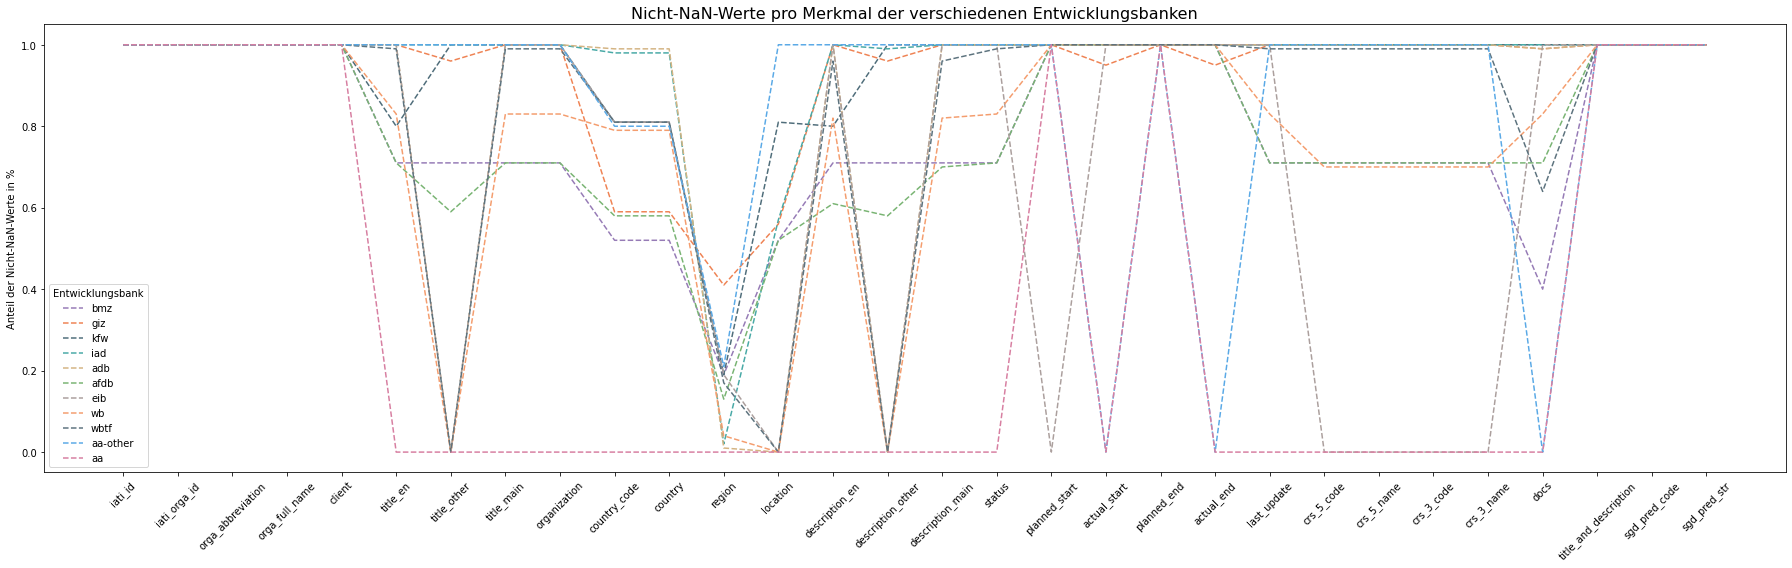

In [47]:
color_palette = [
    '#967BB6',  # Rich lavender
    '#EF8354',  # Deep coral
    '#4F6D7A',  # Cool teal
    '#48A9A6',  # Vivid cerulean
    '#D4B483',  # Earthy ochre
    '#79B473',  # Lush green
    '#AB9F9D',  # Warm taupe
    '#F49D6E',  # Vibrant tangerine
    '#5D737E',  # Moody slate
    '#5AA9E6',  # Bright sky blue
    '#D77FA1',  # Soft rose
]

linestyles = ["--", "-.", "--", "-.", "--", "-.", "--", "-.", "--"]

# Plot all lines together
plt.figure(figsize=(25, 8))

for i in range(0, len(orgas_names)):
    sns.lineplot(x=range(len(columns_list)), y=nan_list[i], label=orgas_names[i], linestyle="--", color=color_palette[i])

plt.title('Nicht-NaN-Werte pro Merkmal der verschiedenen Entwicklungsbanken', fontsize=16)
plt.ylabel('Anteil der Nicht-NaN-Werte in %')
plt.xticks(ticks=range(len(columns_list)), labels=columns_list, rotation=45)
plt.legend(title='Entwicklungsbank')
plt.grid(False)
plt.tight_layout()
plt.savefig('img/all_nan_features.png')
plt.show()


## **Description Length (amount of words)**

- For most organizations Median is around 30 words per description
- Median lowest for  WB with 28 words
- Meidan highest for ADF with 255 words

In [ ]:
# ignoring NaN values
# getting words (strip())
for org in orgas:
    df = orgas[org][0]  
    length_list = df['description_en'].dropna().apply(lambda x: len(x.split())).to_list()
    orgas[org][1] = length_list 

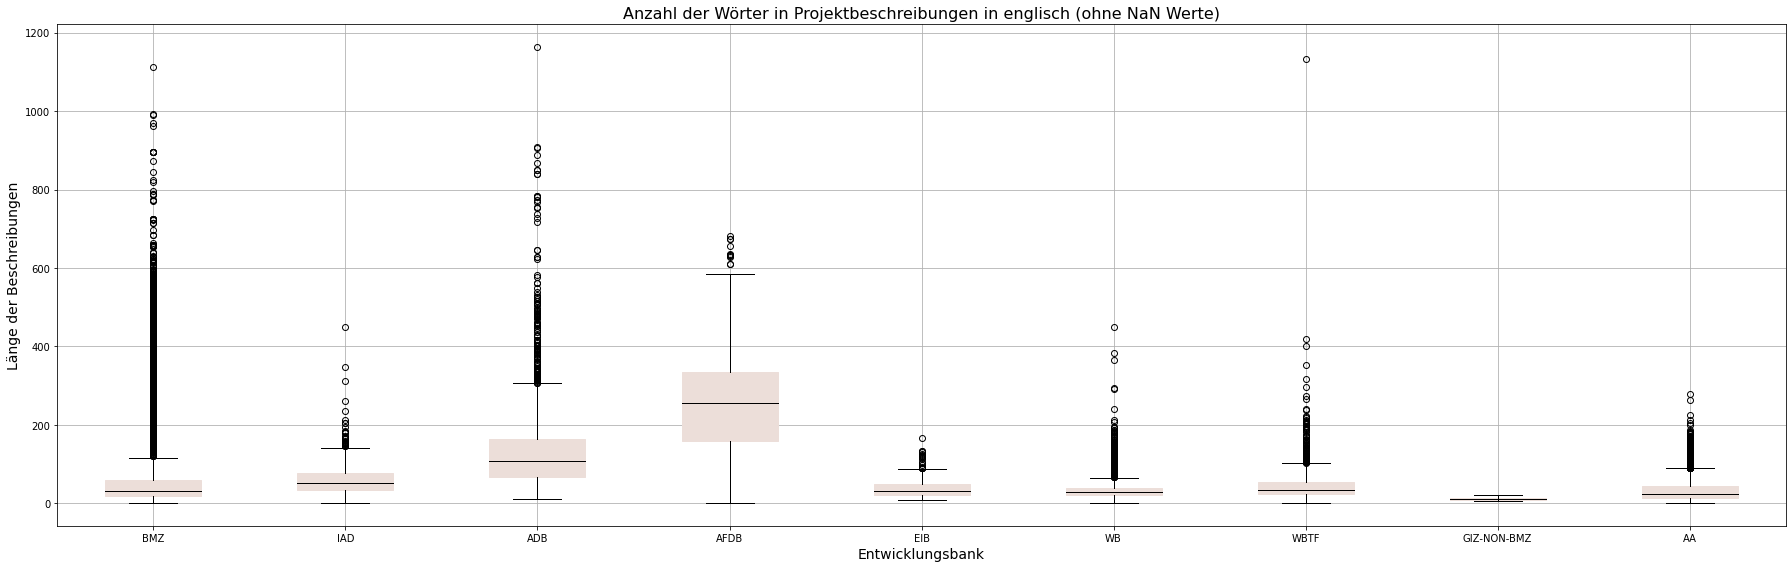

,Organization,mean,median,std,var
0,BMZ,66.837676,32.0,98.117186,9626.982097
1,IAD,60.003457,53.0,38.244788,1462.663774
2,ADB,135.296614,108.0,112.449050,12644.788805
3,AFDB,242.502660,257.0,130.539260,17040.498473
4,EIB,37.778393,32.0,22.022921,485.009062
5,WB,35.552815,28.0,29.623597,877.557527
6,WBTF,50.023355,33.5,58.885919,3467.551472
7,GIZ-NON-BMZ,11.312500,10.0,4.198989,17.631510
8,AA,35.494892,25.0,30.639808,938.797836


In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))

positions = range(len(orgas.keys()))
ax.boxplot([orgas[org][1] for org in orgas], positions=positions, patch_artist=True, boxprops=dict(facecolor='#ecded9', color='#ecded9'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    medianprops=dict(color='black'))

ax.set_xticks(positions)
ax.set_xticklabels(orgas.keys())

ax.set_title('Anzahl der Wörter in Projektbeschreibungen in englisch (ohne NaN Werte)', fontsize=16)
ax.set_ylabel('Länge der Beschreibungen', fontsize=14)
ax.set_xlabel('Entwicklungsbank', fontsize=14)

plt.grid(True)
plt.tight_layout()  
plt.savefig(f'img/len_descr_eng_without_nan.png')
plt.show()

data = {
    "Organization": [],
    "mean": [],
    "median": [],
    "std": [],
    "var": []
}

for key in orgas:
    lengths_array = np.array(orgas[key][1])
    mean = np.mean(lengths_array)
    median = np.median(lengths_array)
    std_dev = np.std(lengths_array)
    variance = np.var(lengths_array)
    
    data["Organization"].append(key)
    data["mean"].append(mean)
    data["median"].append(median)
    data["std"].append(std_dev)
    data["var"].append(variance)


len_descr_df = pd.DataFrame(data)
len_descr_df


### Sample english description for World Bank (WB) with 28 words (median)

In [ ]:
wb_len = len(wb_df.description_en.iloc[0].split())

wb_text = wb_df.description_en.iloc[0][:-2]

markdown_text = f"""
### "{wb_text}"

"""
display(Markdown(markdown_text))


### "To improve the capacity of the African Union Commission and the African Continental Free Trade Area Secretariat in supporting member states to negotiate and implement selected commitments to enhance regional integration and intracontinental trade in Africa."



## **Deeper look into NaN values for description feature**

Deeper analysis of NaN Values for the description feture

- In how many cases is there no english description?
- In how many cases is there no description at all?

### In how many cases is there no **english** description?

In [ ]:
for org in orgas:
    df = orgas[org][0]  
    nan_values = (round((df['description_en'].isna().sum() / len(df['description_en']) ) *100, 2),  df['description_en'].isna().sum())
    orgas[org][1] = nan_values 

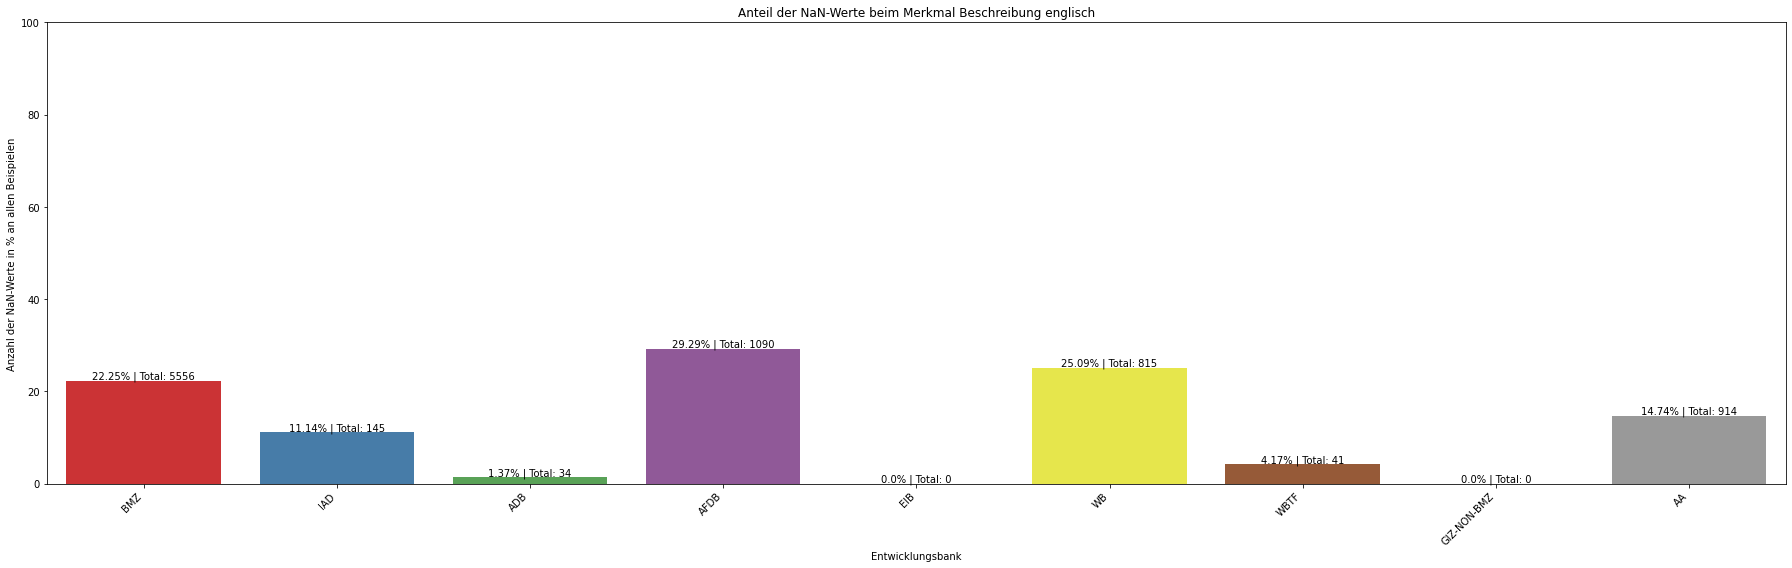

In [ ]:
org_names = list(orgas.keys())
nan_counts = [orgas[org][1][0] for org in orgas]

palette = sns.color_palette("Set1")

plt.figure(figsize=(25, 8))
ax = sns.barplot(x=org_names, y=nan_counts, palette=palette)

margin = 0.4
for idx, bar in enumerate(ax.patches):
    nan_count = nan_counts[idx]
    total_count = orgas[org_names[idx]][1][1]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + margin, f'{nan_count}% | Total: {total_count}', ha='center', color='black', fontsize=10)

plt.xlabel('Entwicklungsbank')
plt.ylabel('Anzahl der NaN-Werte in % an allen Beispielen')
plt.ylim(0, 100)
plt.title('Anteil der NaN-Werte beim Merkmal Beschreibung englisch')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'img/nan_with_descr_en.png')
plt.show()

### In how many cases is there **no description at all**?

In [ ]:
for org in orgas:
    df = orgas[org][0]  
    nan_values_both_columns = (round((((df['description_en'].isna()) & (df['description_other'].isna())).sum() / len(df)) * 100, 2), ((df['description_en'].isna()) & (df['description_other'].isna())).sum())
    orgas[org][1] = nan_values_both_columns 

C:\Users\USERNA~1\AppData\Local\Temp/ipykernel_17976/3860076883.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


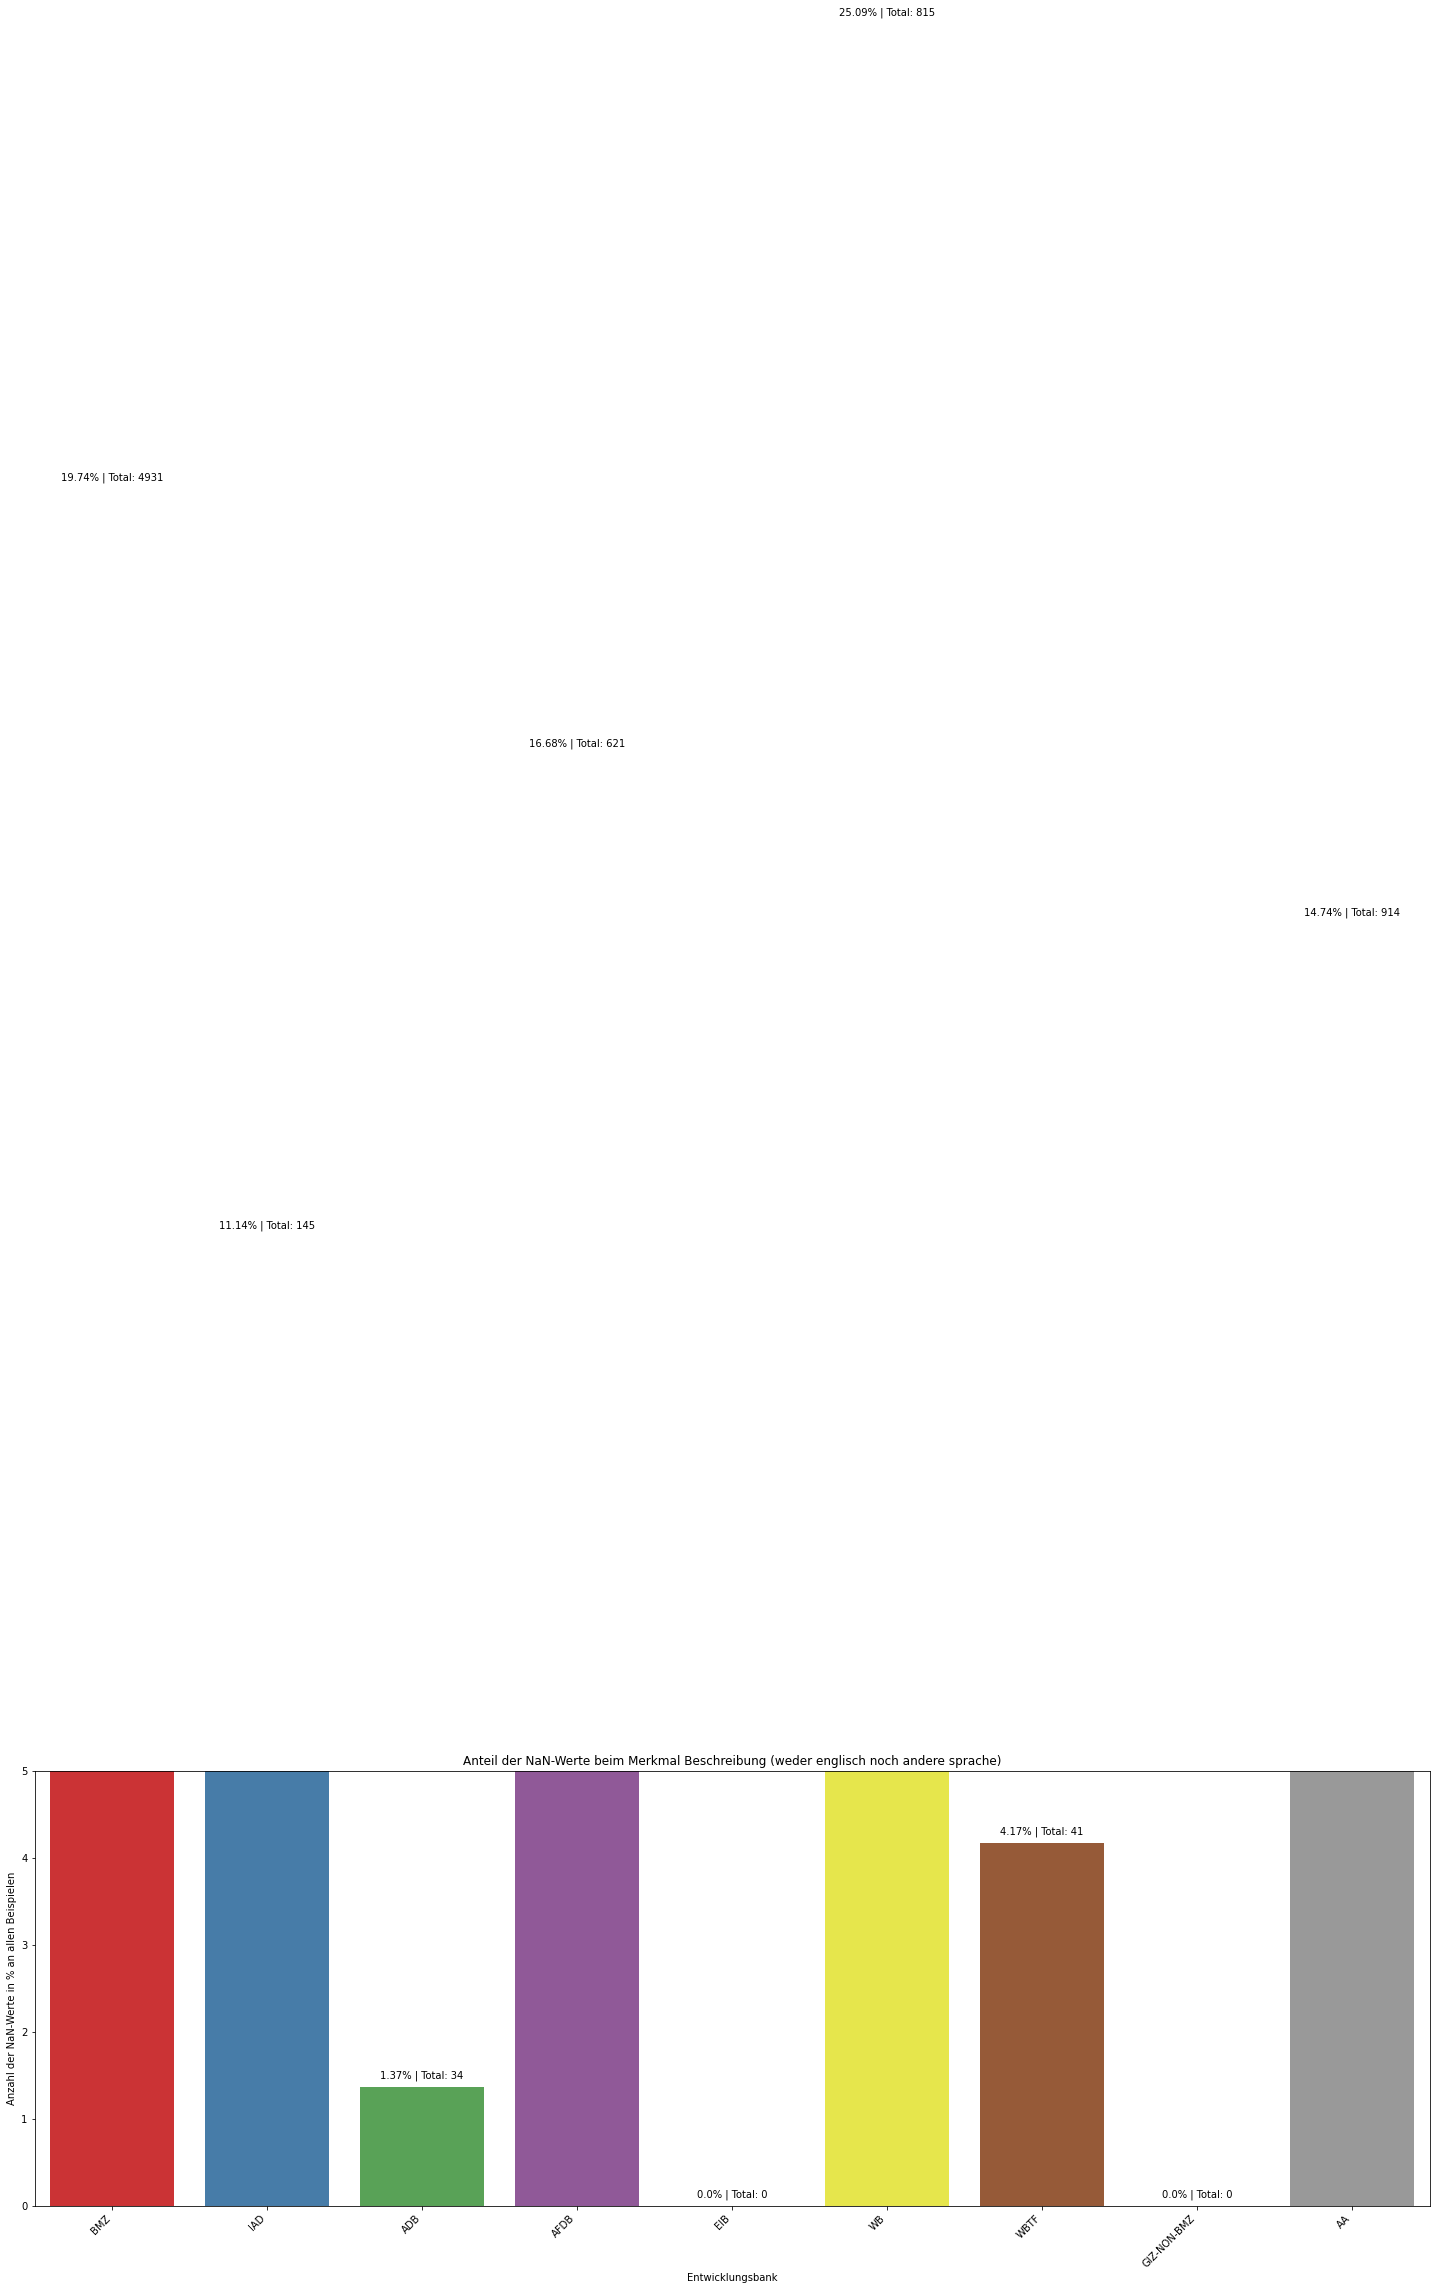

In [ ]:
org_names = list(orgas.keys())
nan_counts = [orgas[org][1][0] for org in orgas]

palette = sns.color_palette("Set1")

plt.figure(figsize=(25, 8))
ax = sns.barplot(x=org_names, y=nan_counts, palette=palette)

margin = 0.1
for idx, bar in enumerate(ax.patches):
    nan_count = nan_counts[idx]
    total_count = orgas[org_names[idx]][1][1]
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + margin, f'{nan_count}% | Total: {total_count}', ha='center', color='black', fontsize=10)

plt.xlabel('Entwicklungsbank')
plt.ylabel('Anzahl der NaN-Werte in % an allen Beispielen')
plt.ylim(0, 5)
plt.title('Anteil der NaN-Werte beim Merkmal Beschreibung (weder englisch noch andere sprache)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'img/nan_with_descr_en_&_other.png')
plt.show()

In [ ]:
print("x")

x
